This is the notebook of kaggle competition "House Prices - Advanced Regression Techniques"

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import pandas as pd

def load_digits_data(digits_path='data'):
    train_csv_path = os.path.join(digits_path, "train.csv")
    test_csv_path = os.path.join(digits_path, "test.csv")
    return pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)

train, test = load_digits_data()

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [5]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
train["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [8]:
train.loc[0][1:]

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64

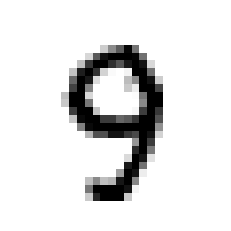

9


In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = train.loc[310]
some_digit_image = some_digit[1:].to_numpy().reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

print(some_digit[0])

In [10]:
X_train = train.iloc[:, 1:]
X_train.shape

(42000, 784)

In [11]:
y_train = train['label']
y_train.shape

(42000,)

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="log", penalty="l2", random_state=42, verbose=3, n_jobs=-1)
sgd_clf.fit(X_train, y_train) 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
-- Epoch 1
Norm: 8614.00, NNZs: 618, Bias: -156.273806, T: 42000, Avg. loss: 50510.417740
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 7446.61, NNZs: 610, Bias: -19.971494, T: 42000, Avg. loss: 58515.035580
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 8794.97, NNZs: 641, Bias: -94.433947, T: 42000, Avg. loss: 73425.264554
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 6135.71, NNZs: 553, Bias: -30.463047, T: 42000, Avg. loss: 25434.790560
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 8464.33, NNZs: 588, Bias: -110.848392, T: 42000, Avg. loss: 64336.464296
Total training time: 0.10 seconds.
Norm: 8888.60, NNZs: 596, Bias: -228.720687, T: 42000, Avg. loss: 116809.009370
Total training time: 0.10 seconds.
-- Epoch 2-- Epoch 2

Norm: 10095.88, NNZs: 613, Bias: 0.769169, T: 42000, Avg. loss: 126101.281861
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 8850.13, NNZ

-- Epoch 9
Norm: 2380.42, NNZs: 635, Bias: 19.302253, T: 336000, Avg. loss: 3564.356630
Total training time: 0.81 seconds.
-- Epoch 9
Norm: 2068.63, NNZs: 661, Bias: -348.759783, T: 336000, Avg. loss: 4746.925887
Total training time: 0.82 seconds.
-- Epoch 9
Norm: 2135.29, NNZs: 652, Bias: -827.981669, T: 336000, Avg. loss: 7268.737693
Total training time: 0.83 seconds.
-- Epoch 9
Norm: 1937.68, NNZs: 637, Bias: -196.783097, T: 420000, Avg. loss: 878.900634
Total training time: 0.85 seconds.
-- Epoch 11
Norm: 1805.35, NNZs: 650, Bias: -203.648898, T: 378000, Avg. loss: 2529.533488
Total training time: 0.85 seconds.
-- Epoch 10
Norm: 1727.90, NNZs: 610, Bias: -159.049407, T: 378000, Avg. loss: 1533.584981
Total training time: 0.86 seconds.
-- Epoch 10
Norm: 1458.76, NNZs: 611, Bias: -39.683776, T: 378000, Avg. loss: 610.307985
Total training time: 0.87 seconds.
-- Epoch 10
Norm: 1684.25, NNZs: 653, Bias: -27.460345, T: 378000, Avg. loss: 1544.491977
Total training time: 0.89 seconds.
--

Norm: 1448.87, NNZs: 641, Bias: 25.404825, T: 672000, Avg. loss: 1718.693473
Total training time: 1.61 seconds.
-- Epoch 17
Norm: 1230.74, NNZs: 667, Bias: -383.280646, T: 672000, Avg. loss: 2377.771508
Total training time: 1.63 seconds.
-- Epoch 17
Norm: 1122.40, NNZs: 617, Bias: -171.960606, T: 714000, Avg. loss: 765.748228
Total training time: 1.66 seconds.
-- Epoch 18
Norm: 1233.21, NNZs: 661, Bias: -907.687056, T: 672000, Avg. loss: 3478.697504
Total training time: 1.65 seconds.
-- Epoch 17
Norm: 947.78, NNZs: 620, Bias: -41.554387, T: 756000, Avg. loss: 266.577924
Total training time: 1.66 seconds.
-- Epoch 19
Norm: 1214.17, NNZs: 643, Bias: -206.543783, T: 840000, Avg. loss: 430.903656
Total training time: 1.69 seconds.
-- Epoch 21
Norm: 1110.33, NNZs: 653, Bias: -29.416871, T: 714000, Avg. loss: 772.619273
Total training time: 1.69 seconds.
-- Epoch 18
Norm: 1341.88, NNZs: 671, Bias: -127.134379, T: 714000, Avg. loss: 865.593479
Total training time: 1.69 seconds.
-- Epoch 18
No

Norm: 868.37, NNZs: 619, Bias: -179.341100, T: 1050000, Avg. loss: 505.507226
Total training time: 2.45 seconds.
-- Epoch 26
Norm: 886.18, NNZs: 673, Bias: -405.121027, T: 1050000, Avg. loss: 1454.560127
Total training time: 2.45 seconds.
-- Epoch 26
Norm: 842.02, NNZs: 655, Bias: -30.301455, T: 1050000, Avg. loss: 514.848178
Total training time: 2.46 seconds.
-- Epoch 26
Norm: 849.86, NNZs: 660, Bias: -222.340635, T: 1092000, Avg. loss: 821.957138
Total training time: 2.47 seconds.
-- Epoch 27
Norm: 966.24, NNZs: 648, Bias: -211.248234, T: 1176000, Avg. loss: 284.786785
Total training time: 2.48 seconds.
-- Epoch 29
Norm: 933.10, NNZs: 664, Bias: -954.014131, T: 1008000, Avg. loss: 2290.808827
Total training time: 2.49 seconds.
-- Epoch 25
Norm: 1004.09, NNZs: 674, Bias: -130.364019, T: 1050000, Avg. loss: 556.019711
Total training time: 2.50 seconds.
-- Epoch 26
Norm: 760.13, NNZs: 628, Bias: -42.564618, T: 1134000, Avg. loss: 175.134337
Total training time: 2.51 seconds.
-- Epoch 28

Norm: 668.96, NNZs: 657, Bias: -31.020942, T: 1428000, Avg. loss: 371.847328
Norm: 721.25, NNZs: 620, Bias: -184.565601, T: 1386000, Avg. loss: 380.129396Total training time: 3.27 seconds.

Total training time: 3.27 seconds.
-- Epoch 35
-- Epoch 34
Norm: 797.10, NNZs: 650, Bias: -214.611111, T: 1554000, Avg. loss: 206.861277
Total training time: 3.29 seconds.
-- Epoch 38
Norm: 698.86, NNZs: 668, Bias: -226.802464, T: 1428000, Avg. loss: 632.978315
Total training time: 3.32 seconds.
-- Epoch 35
Norm: 833.59, NNZs: 676, Bias: -132.870295, T: 1386000, Avg. loss: 422.712714
Total training time: 3.32 seconds.
-- Epoch 34
Norm: 657.55, NNZs: 628, Bias: -43.190718, T: 1470000, Avg. loss: 126.637575
Total training time: 3.32 seconds.
-- Epoch 36
Norm: 759.53, NNZs: 670, Bias: -986.373944, T: 1344000, Avg. loss: 1727.073626
Total training time: 3.34 seconds.
-- Epoch 33
Norm: 722.64, NNZs: 644, Bias: -361.741862, T: 1386000, Avg. loss: 858.349057
Total training time: 3.37 seconds.
-- Epoch 34
N

Norm: 619.56, NNZs: 644, Bias: -368.642451, T: 1680000, Avg. loss: 720.973892
Total training time: 4.10 seconds.
-- Epoch 41
Norm: 581.76, NNZs: 657, Bias: -31.736777, T: 1764000, Avg. loss: 313.846144
Total training time: 4.11 seconds.
-- Epoch 43
Norm: 617.44, NNZs: 623, Bias: -188.611476, T: 1722000, Avg. loss: 312.649570
Total training time: 4.12 seconds.
-- Epoch 42
Norm: 764.72, NNZs: 647, Bias: 33.748832, T: 1680000, Avg. loss: 647.857429
Total training time: 4.12 seconds.
-- Epoch 41
Norm: 607.26, NNZs: 673, Bias: -429.866926, T: 1764000, Avg. loss: 857.537081
Total training time: 4.15 seconds.
-- Epoch 43
Norm: 603.92, NNZs: 668, Bias: -230.500251, T: 1764000, Avg. loss: 514.367342
Total training time: 4.16 seconds.
-- Epoch 43
Norm: 690.38, NNZs: 650, Bias: -217.411588, T: 1932000, Avg. loss: 172.789741
Total training time: 4.17 seconds.
-- Epoch 47
Norm: 703.98, NNZs: 676, Bias: -135.043720, T: 1764000, Avg. loss: 316.257442
Total training time: 4.17 seconds.
-- Epoch 43
Nor

Norm: 551.66, NNZs: 624, Bias: -192.046785, T: 2058000, Avg. loss: 261.202323
Total training time: 4.94 seconds.
-- Epoch 50
Norm: 564.86, NNZs: 672, Bias: -1028.739314, T: 1974000, Avg. loss: 1153.575472
Total training time: 4.94 seconds.
-- Epoch 48
Norm: 537.17, NNZs: 673, Bias: -438.184618, T: 2100000, Avg. loss: 722.659307
Total training time: 4.94 seconds.
-- Epoch 51
Norm: 620.99, NNZs: 650, Bias: -219.418970, T: 2268000, Avg. loss: 145.000446
Total training time: 4.97 seconds.
-- Epoch 55
Norm: 528.71, NNZs: 668, Bias: -233.479743, T: 2100000, Avg. loss: 433.079437
Total training time: 4.98 seconds.
-- Epoch 51
Norm: 662.89, NNZs: 650, Bias: 35.478173, T: 2058000, Avg. loss: 528.791521
Total training time: 4.98 seconds.
-- Epoch 50
Norm: 519.75, NNZs: 657, Bias: -32.196897, T: 2142000, Avg. loss: 245.984119
Total training time: 4.99 seconds.
-- Epoch 52
Norm: 615.84, NNZs: 677, Bias: -136.683733, T: 2142000, Avg. loss: 268.173534
Total training time: 5.00 seconds.
-- Epoch 52
N

Norm: 495.05, NNZs: 645, Bias: -380.684774, T: 2352000, Avg. loss: 518.280784
Total training time: 5.76 seconds.
-- Epoch 57
Norm: 494.70, NNZs: 624, Bias: -194.798962, T: 2394000, Avg. loss: 213.713781
Total training time: 5.78 seconds.
-- Epoch 58
Norm: 564.21, NNZs: 650, Bias: -221.207140, T: 2604000, Avg. loss: 128.587189
Total training time: 5.80 seconds.
-- Epoch 63
Norm: 479.15, NNZs: 675, Bias: -445.116755, T: 2436000, Avg. loss: 598.806866
Total training time: 5.80 seconds.
-- Epoch 59
Norm: 503.48, NNZs: 672, Bias: -1046.299216, T: 2310000, Avg. loss: 985.174057
Total training time: 5.80 seconds.
-- Epoch 56
Norm: 470.44, NNZs: 668, Bias: -235.997807, T: 2436000, Avg. loss: 377.616956
Total training time: 5.81 seconds.
-- Epoch 59
Norm: 583.77, NNZs: 656, Bias: 37.067723, T: 2436000, Avg. loss: 451.042997
Total training time: 5.81 seconds.
-- Epoch 59
Norm: 548.83, NNZs: 677, Bias: -138.058521, T: 2520000, Avg. loss: 227.802645
Total training time: 5.82 seconds.
-- Epoch 61
N

Norm: 450.52, NNZs: 624, Bias: -197.163926, T: 2730000, Avg. loss: 193.528611
Total training time: 6.58 seconds.
-- Epoch 66
Norm: 519.30, NNZs: 650, Bias: -222.661611, T: 2940000, Avg. loss: 108.689607
Total training time: 6.59 seconds.
-- Epoch 71
Norm: 458.51, NNZs: 674, Bias: -1061.307127, T: 2646000, Avg. loss: 844.111717
Total training time: 6.59 seconds.
-- Epoch 64
Norm: 531.59, NNZs: 657, Bias: 38.072856, T: 2772000, Avg. loss: 403.594426
Total training time: 6.60 seconds.
-- Epoch 67
Norm: 456.88, NNZs: 633, Bias: -44.851839, T: 2856000, Avg. loss: 61.482209
Total training time: 6.60 seconds.
-- Epoch 69
Norm: 437.53, NNZs: 675, Bias: -451.269582, T: 2772000, Avg. loss: 538.653027
Total training time: 6.60 seconds.
-- Epoch 67
Norm: 427.26, NNZs: 668, Bias: -238.137955, T: 2772000, Avg. loss: 327.144213
Total training time: 6.62 seconds.
-- Epoch 67
Norm: 496.93, NNZs: 678, Bias: -139.189579, T: 2856000, Avg. loss: 199.919589
Total training time: 6.63 seconds.
-- Epoch 69
Nor

Norm: 410.49, NNZs: 625, Bias: -199.401271, T: 3108000, Avg. loss: 163.384584
Total training time: 7.42 seconds.
Norm: 483.96, NNZs: 650, Bias: -224.004078, T: 3276000, Avg. loss: 103.500310-- Epoch 75
Total training time: 7.42 seconds.

-- Epoch 79
Norm: 403.48, NNZs: 675, Bias: -456.464475, T: 3108000, Avg. loss: 470.758459
Total training time: 7.42 seconds.
-- Epoch 75
Norm: 422.88, NNZs: 674, Bias: -1074.555412, T: 2982000, Avg. loss: 751.318503
Total training time: 7.46 seconds.
-- Epoch 72
Norm: 394.47, NNZs: 668, Bias: -240.025299, T: 3108000, Avg. loss: 290.260227
Total training time: 7.47 seconds.
-- Epoch 75
Norm: 490.20, NNZs: 657, Bias: 39.017381, T: 3108000, Avg. loss: 353.681392
Total training time: 7.46 seconds.
-- Epoch 75
Norm: 428.03, NNZs: 633, Bias: -45.131220, T: 3234000, Avg. loss: 52.124224
Total training time: 7.48 seconds.
-- Epoch 78
Norm: 393.34, NNZs: 658, Bias: -33.121687, T: 3150000, Avg. loss: 170.498635
Total training time: 7.48 seconds.
-- Epoch 76
Norm

Norm: 372.48, NNZs: 675, Bias: -461.249250, T: 3444000, Avg. loss: 427.216993
Total training time: 8.23 seconds.
-- Epoch 83
Norm: 380.87, NNZs: 625, Bias: -201.466516, T: 3486000, Avg. loss: 150.374645
Total training time: 8.24 seconds.
-- Epoch 84
Norm: 363.16, NNZs: 668, Bias: -241.735073, T: 3444000, Avg. loss: 256.319866
Total training time: 8.28 seconds.
-- Epoch 83
Norm: 381.81, NNZs: 655, Bias: -393.727186, T: 3402000, Avg. loss: 352.761760
Total training time: 8.28 seconds.
-- Epoch 82
Norm: 454.17, NNZs: 658, Bias: 40.026205, T: 3444000, Avg. loss: 317.621822
Total training time: 8.29 seconds.
-- Epoch 83
Norm: 390.32, NNZs: 674, Bias: -1086.106022, T: 3318000, Avg. loss: 670.054164
Total training time: 8.29 seconds.
-- Epoch 80
Norm: 427.66, NNZs: 678, Bias: -140.976928, T: 3528000, Avg. loss: 165.396234
Total training time: 8.31 seconds.
-- Epoch 85
Norm: 365.14, NNZs: 658, Bias: -33.386748, T: 3486000, Avg. loss: 155.046684
Total training time: 8.31 seconds.
-- Epoch 84
No

Norm: 362.49, NNZs: 674, Bias: -1097.798589, T: 3696000, Avg. loss: 607.816101
Total training time: 9.06 seconds.
-- Epoch 89
Norm: 425.28, NNZs: 658, Bias: 40.942305, T: 3780000, Avg. loss: 294.868854
Total training time: 9.07 seconds.
-- Epoch 91
Norm: 341.35, NNZs: 659, Bias: -33.659255, T: 3822000, Avg. loss: 138.750733
Total training time: 9.08 seconds.
-- Epoch 92
Norm: 399.56, NNZs: 678, Bias: -141.741314, T: 3864000, Avg. loss: 146.285798
Total training time: 9.09 seconds.
-- Epoch 93
Norm: 355.88, NNZs: 625, Bias: -203.268974, T: 3864000, Avg. loss: 135.362953
Total training time: 9.11 seconds.
-- Epoch 93
Norm: 384.62, NNZs: 634, Bias: -45.526362, T: 3990000, Avg. loss: 44.558828
Total training time: 9.11 seconds.
-- Epoch 96
Norm: 349.32, NNZs: 676, Bias: -465.930599, T: 3822000, Avg. loss: 387.396208
Total training time: 9.12 seconds.
-- Epoch 92
Norm: 354.23, NNZs: 655, Bias: -397.684604, T: 3822000, Avg. loss: 309.213879
Total training time: 9.13 seconds.
-- Epoch 92
Norm

Norm: 331.01, NNZs: 655, Bias: -401.307714, T: 4242000, Avg. loss: 279.947859
Total training time: 9.90 seconds.
-- Epoch 102
Norm: 322.76, NNZs: 676, Bias: -470.670413, T: 4242000, Avg. loss: 346.877166
Total training time: 9.90 seconds.
-- Epoch 102
Norm: 332.25, NNZs: 674, Bias: -1110.411385, T: 4158000, Avg. loss: 524.634342
Total training time: 9.91 seconds.
-- Epoch 100
Norm: 315.15, NNZs: 671, Bias: -245.041163, T: 4200000, Avg. loss: 207.947314
Total training time: 9.91 seconds.
-- Epoch 101
Norm: 314.65, NNZs: 659, Bias: -33.951447, T: 4242000, Avg. loss: 124.153680
Total training time: 9.94 seconds.
-- Epoch 102
Norm: 368.39, NNZs: 678, Bias: -142.649012, T: 4284000, Avg. loss: 137.379991
Total training time: 9.95 seconds.
-- Epoch 103
Norm: 392.30, NNZs: 658, Bias: 41.879235, T: 4200000, Avg. loss: 259.439854
Total training time: 9.95 seconds.
-- Epoch 101
Norm: 330.44, NNZs: 625, Bias: -205.255568, T: 4326000, Avg. loss: 122.327781
Total training time: 9.96 seconds.
-- Epoc

Norm: 301.99, NNZs: 676, Bias: -475.355383, T: 4704000, Avg. loss: 315.650733
Total training time: 10.75 seconds.
-- Epoch 113
Norm: 307.41, NNZs: 675, Bias: -1121.641037, T: 4620000, Avg. loss: 485.376175
Total training time: 10.75 seconds.
-- Epoch 111
Norm: 304.62, NNZs: 625, Bias: -207.049651, T: 4788000, Avg. loss: 106.263747
Total training time: 10.77 seconds.
-- Epoch 115
Norm: 293.67, NNZs: 671, Bias: -246.590353, T: 4620000, Avg. loss: 198.437228
Total training time: 10.78 seconds.
-- Epoch 111
Norm: 294.75, NNZs: 659, Bias: -34.265960, T: 4662000, Avg. loss: 109.728097
Total training time: 10.80 seconds.
-- Epoch 112
Norm: 305.42, NNZs: 655, Bias: -405.113591, T: 4746000, Avg. loss: 248.953270
Total training time: 10.80 seconds.
-- Epoch 114
Norm: 344.46, NNZs: 678, Bias: -143.442910, T: 4704000, Avg. loss: 120.621056
Total training time: 10.81 seconds.
-- Epoch 113
Norm: 299.81, NNZs: 676, Bias: -475.769157, T: 4746000, Avg. loss: 310.754246
Total training time: 10.83 second

[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   11.2s remaining:   26.0s


Norm: 290.77, NNZs: 675, Bias: -1129.013024, T: 4956000, Avg. loss: 438.754420
Total training time: 11.36 seconds.
-- Epoch 119
Norm: 278.45, NNZs: 671, Bias: -247.547275, T: 4914000, Avg. loss: 185.702588
Total training time: 11.36 seconds.
-- Epoch 118
Norm: 281.27, NNZs: 659, Bias: -34.444014, T: 4956000, Avg. loss: 108.931720
Total training time: 11.38 seconds.
Convergence after 118 epochs took 11.38 seconds
Norm: 349.26, NNZs: 658, Bias: 43.337888, T: 4914000, Avg. loss: 219.998001
Total training time: 11.38 seconds.
-- Epoch 118
Norm: 290.44, NNZs: 656, Bias: -407.421084, T: 5082000, Avg. loss: 235.556686
Total training time: 11.39 seconds.
-- Epoch 122
Norm: 291.67, NNZs: 625, Bias: -208.413913, T: 5166000, Avg. loss: 103.165190
Total training time: 11.41 seconds.
-- Epoch 124
Norm: 285.50, NNZs: 676, Bias: -478.864225, T: 5082000, Avg. loss: 286.727807
Total training time: 11.41 seconds.
-- Epoch 122
Norm: 287.90, NNZs: 675, Bias: -1129.907655, T: 4998000, Avg. loss: 438.932406

Norm: 257.73, NNZs: 671, Bias: -249.443960, T: 5502000, Avg. loss: 168.058019
Total training time: 12.17 seconds.
-- Epoch 132
Norm: 268.32, NNZs: 676, Bias: -483.595520, T: 5628000, Avg. loss: 259.348874
Total training time: 12.18 seconds.
-- Epoch 135
Norm: 321.41, NNZs: 659, Bias: 44.311262, T: 5502000, Avg. loss: 200.757584
Total training time: 12.19 seconds.
-- Epoch 132
Norm: 268.31, NNZs: 675, Bias: -1140.938173, T: 5544000, Avg. loss: 397.123459
Total training time: 12.19 seconds.
-- Epoch 133
Norm: 256.08, NNZs: 671, Bias: -249.554978, T: 5544000, Avg. loss: 161.602475
Total training time: 12.22 seconds.
-- Epoch 133
Norm: 266.46, NNZs: 676, Bias: -483.913195, T: 5670000, Avg. loss: 259.327013
Total training time: 12.23 seconds.
-- Epoch 136
Norm: 320.08, NNZs: 659, Bias: 44.396079, T: 5544000, Avg. loss: 192.295374
Total training time: 12.24 seconds.
-- Epoch 133
Norm: 266.11, NNZs: 675, Bias: -1141.700285, T: 5586000, Avg. loss: 385.641940
Total training time: 12.24 seconds.

Norm: 243.17, NNZs: 676, Bias: -489.560499, T: 6426000, Avg. loss: 227.095730
Total training time: 13.22 seconds.
-- Epoch 154
Norm: 231.66, NNZs: 676, Bias: -251.710705, T: 6342000, Avg. loss: 146.095712
Total training time: 13.24 seconds.
-- Epoch 152
Norm: 243.73, NNZs: 676, Bias: -1154.870834, T: 6342000, Avg. loss: 339.457281
Total training time: 13.25 seconds.
-- Epoch 152
Norm: 291.58, NNZs: 659, Bias: 45.614077, T: 6342000, Avg. loss: 170.399434
Total training time: 13.27 seconds.
-- Epoch 152
Norm: 242.19, NNZs: 676, Bias: -489.852418, T: 6468000, Avg. loss: 221.137646
Total training time: 13.28 seconds.
-- Epoch 155
Norm: 230.33, NNZs: 676, Bias: -251.811211, T: 6384000, Avg. loss: 140.031812
Total training time: 13.30 seconds.
-- Epoch 153
Norm: 242.18, NNZs: 676, Bias: -1155.547762, T: 6384000, Avg. loss: 337.564084
Total training time: 13.30 seconds.
-- Epoch 153
Norm: 290.01, NNZs: 659, Bias: 45.681539, T: 6384000, Avg. loss: 173.889329
Total training time: 13.32 seconds.

Norm: 227.52, NNZs: 676, Bias: -493.951342, T: 7098000, Avg. loss: 208.910287
Total training time: 14.04 seconds.
-- Epoch 170
Norm: 271.42, NNZs: 659, Bias: 46.498262, T: 7014000, Avg. loss: 154.492714
Total training time: 14.08 seconds.
-- Epoch 168
Norm: 224.34, NNZs: 676, Bias: -1165.093871, T: 7014000, Avg. loss: 303.847475
Total training time: 14.08 seconds.
-- Epoch 168
Norm: 215.85, NNZs: 678, Bias: -253.435587, T: 7056000, Avg. loss: 130.179506
Total training time: 14.09 seconds.
-- Epoch 169
Norm: 227.12, NNZs: 676, Bias: -494.203112, T: 7140000, Avg. loss: 206.240482
Total training time: 14.10 seconds.
-- Epoch 171
Norm: 269.57, NNZs: 659, Bias: 46.548169, T: 7056000, Avg. loss: 156.184416
Total training time: 14.13 seconds.
-- Epoch 169
Norm: 223.56, NNZs: 676, Bias: -1165.705901, T: 7056000, Avg. loss: 305.948801
Total training time: 14.13 seconds.
-- Epoch 169
Norm: 214.44, NNZs: 678, Bias: -253.518362, T: 7098000, Avg. loss: 127.550738
Total training time: 14.14 seconds.

[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   14.4s remaining:    6.2s


Norm: 220.13, NNZs: 676, Bias: -495.977748, T: 7434000, Avg. loss: 194.409308
Total training time: 14.45 seconds.
-- Epoch 178
Norm: 206.85, NNZs: 678, Bias: -254.152427, T: 7392000, Avg. loss: 124.445572
Total training time: 14.48 seconds.
Convergence after 176 epochs took 14.48 seconds
Norm: 215.76, NNZs: 676, Bias: -1169.852712, T: 7350000, Avg. loss: 293.067826
Total training time: 14.48 seconds.
-- Epoch 176
Norm: 219.31, NNZs: 676, Bias: -496.227214, T: 7476000, Avg. loss: 194.018643
Total training time: 14.49 seconds.
-- Epoch 179
Norm: 215.86, NNZs: 676, Bias: -1170.418456, T: 7392000, Avg. loss: 290.332475
Total training time: 14.53 seconds.
-- Epoch 177
Norm: 217.98, NNZs: 676, Bias: -496.468125, T: 7518000, Avg. loss: 196.534934
Total training time: 14.54 seconds.
-- Epoch 180
Norm: 214.66, NNZs: 676, Bias: -1171.007831, T: 7434000, Avg. loss: 290.016869
Total training time: 14.58 seconds.
-- Epoch 178
Norm: 217.33, NNZs: 676, Bias: -496.710011, T: 7560000, Avg. loss: 190.24

Norm: 195.61, NNZs: 676, Bias: -503.939576, T: 8904000, Avg. loss: 163.568766
Total training time: 16.03 seconds.
-- Epoch 213
Norm: 189.94, NNZs: 677, Bias: -1187.659737, T: 8778000, Avg. loss: 239.649482
Total training time: 16.05 seconds.
-- Epoch 210
Norm: 194.48, NNZs: 676, Bias: -504.153913, T: 8946000, Avg. loss: 160.752125
Total training time: 16.08 seconds.
-- Epoch 214
Norm: 189.83, NNZs: 677, Bias: -1188.132677, T: 8820000, Avg. loss: 241.005352
Total training time: 16.10 seconds.
-- Epoch 211
Norm: 194.39, NNZs: 676, Bias: -504.362758, T: 8988000, Avg. loss: 159.973129
Total training time: 16.13 seconds.
-- Epoch 215
Norm: 188.97, NNZs: 677, Bias: -1188.597042, T: 8862000, Avg. loss: 242.314004
Total training time: 16.14 seconds.
-- Epoch 212
Norm: 193.80, NNZs: 676, Bias: -504.549211, T: 9030000, Avg. loss: 159.796546
Total training time: 16.17 seconds.
-- Epoch 216
Norm: 188.32, NNZs: 677, Bias: -1189.049185, T: 8904000, Avg. loss: 240.947692
Total training time: 16.19 se

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.7s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=3, warm_start=False)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [25]:
sgd_clf2 = SGDClassifier(loss="log", penalty="l2", random_state=42, verbose=3, n_jobs=-1)
sgd_clf2.fit(X_train_scaled, y_train) 

TypeError: __init__() got an unexpected keyword argument 'n_iter'

In [15]:
predictions = sgd_clf.predict(test)

In [22]:
test_scaled = scaler.transform(test.astype(np.float64))
predictions_scaled = sgd_clf2.predict(test_scaled)

In [23]:
sub2 = pd.DataFrame({'ImageId': list(range(1, len(predictions_scaled)+1)), 'Label': predictions_scaled})
sub2.shape

(28000, 2)

In [16]:
type(predictions)

numpy.ndarray

In [17]:
len(predictions)

28000

In [18]:
sub = pd.DataFrame({'ImageId': list(range(1, len(predictions)+1)), 'Label': predictions})
sub.shape

(28000, 2)

In [19]:
sub.to_csv("data/submission_script02_sgd.csv", index=False)

In [24]:
sub2.to_csv("data/submission_script02_sgd_std.csv", index=False)